<a href="https://colab.research.google.com/github/MarioROT/IHLT-MAI/blob/main/Session4_MarioRosas_AlamLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab session 4 (Part of Speech Tagging) - IHLT

**Students:**
- Mario Rosas
- Alam Lopez

**Lab Professor:** Salvador Medina Herrera

## Paraphrases Template

In [1]:
%%shell
git clone https://github.com/mariorot/IHLT-MAI.git
cd 'IHLT-MAI'
mv 'complementary_material' /content/
mv scripts /content/

pip install python-crfsuite

Cloning into 'IHLT-MAI'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 209 (delta 14), reused 12 (delta 12), pack-reused 190
Receiving objects: 100% (209/209), 228.93 KiB | 3.14 MiB/s, done.
Resolving deltas: 100% (104/104), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 9.9 MB/s eta 0:00:00


In [2]:
from scripts.models import StatisticalModels
import numpy as np
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

## TODO
1. Consider Treebank corpus.
  - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.
  - Evaluate the resulting 24 models using sentences from 3001.

2. Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).
  - Which model would you select? Justify the answer.

The code for the models is at: https://github.com/MarioROT/IHLT-MAI/blob/main/scripts/models.py


In [3]:
data = nltk.corpus.treebank.tagged_sents()
train = nltk.corpus.treebank.tagged_sents()[:3000]


In [4]:

sm = StatisticalModels(data, [500,1000,1500,2000,2500,3000], 3000, ['HMM', 'TnT', 'PER', 'CRF'])


In [5]:
var1=sm.do()

 17%|█▋        | 1/6 [00:35<02:57, 35.41s/it]

500



 33%|███▎      | 2/6 [01:43<03:38, 54.74s/it]

1000



 50%|█████     | 3/6 [03:27<03:51, 77.32s/it]

1500



 67%|██████▋   | 4/6 [05:43<03:20, 100.46s/it]

2000



 83%|████████▎ | 5/6 [08:22<02:01, 121.34s/it]

2500



  0%|          | 0/100 [11:19<?, ?it/s]

3000


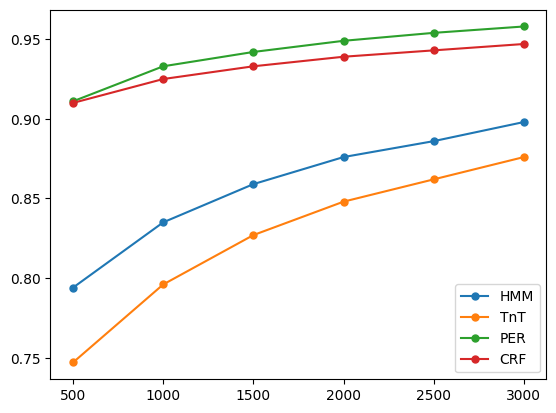

     HMM    TnT     PER     CRF  Sentences
0  0.265  0.198   6.505   3.632        500
1  0.299  0.383   7.610  10.712       1000
2  0.443  0.598  10.273  19.192       1500
3  0.582  0.801  14.248  30.556       2000
4  0.750  0.971  18.022  42.087       2500
5  0.926  1.161  21.087  51.538       3000 
      HMM     TnT    PER    CRF  Sentences
0  5.995  15.935  2.213  0.671        500
1  7.498  39.474  1.614  0.678       1000
2  6.655  64.756  1.610  0.660       1500
3  8.171  78.972  1.677  0.906       2000
4  7.004  87.201  1.632  0.678       2500
5  8.344  90.132  1.629  0.687       3000 
      HMM     TnT     PER     CRF  Sentences
0  6.260  16.132   8.718   4.302        500
1  7.797  39.857   9.224  11.389       1000
2  7.098  65.353  11.883  19.852       1500
3  8.754  79.773  15.924  31.462       2000
4  7.754  88.173  19.653  42.766       2500
5  9.270  91.293  22.716  52.225       3000


In [6]:
sm.results()

# Conclusion

**Which model would you select? Justify the answer.**

1. From the previous graph and tables, we can get some insights:

  - PER was the model with the best accuracy in all the cases, from 500 to 3000 sentences.

  - HMM was the model with the shortest average time for training while the CRF model was the one with the longest.

  - CRF was the model with the shortest average time for testing, followed by PER with the double of time than CRF.

  - HMM was the model with the shortest average overall (training+testing).
  
  - TnT and HMM models are the most sensitive to the amount of data in the training. When we increased from 500 to 3000 sentences, they improved the accuracy by 10 pp, while the PER and the CRF improved only by 5 pp. So, the size of the training data is relevant.


2. Since there is no model that outperfomed the others in all the parameters (accuracy, training time, testing time, overall time), the definition of the best model and therefore the model that we would select, depends on the specific needs of the problem to solve. We need to consider the amount of data for training and the time constraint.

  - If we are focusing, specifically on accuracy, and the time of training or testing is not a constraint, then the PER would be the best option.

  - If we are pursuing to get a near real time model to test some data, and the time for training is not a constraint then the CRF will be the best option.
  - If our goal is to have a model that training time is the main objective because we are going to train it very often, the HMM is the optimal.
  - Finally if the main focus is the overall time of the model due to some limited resources then again the HMM is the best option.
